---
---
# Klasyfikacja jabłek na podstawie analizy cech
---
---

## Opis projektu


---




Niniejszy projekt skupia się na analizie klasyfikacyjnej zbioru danych, który zawiera obszerne informacje na temat różnorodnych cech związanych z owocami. Celem głównym jest porównanie modeli klasyfikacyjnych: **drzewa decyzyjnego i regresji logistycznej**, umożliwiających identyfikację i zaklasyfikowanie jabłek jako dobrej lub złej jakości owoc na podstawie ich unikalnych właściwości, aby ostatecznie przeprowadzić klasyfikację na nowych danych.

Zbiór danych pochodzi ze strony Kaggle: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality i zawiera szczegółowe informacje, takie jak identyfikator owocu, rozmiar, waga, słodycz, chrupkość, soczystość, dojrzałość, kwasowość i jakość. W trakcie projektu będziemy analizować te cechy i wykorzystywać je do opracowania efektywnego modelu klasyfikacyjnego opartego na drzewie decyzyjnym.

Eatpy realizacji zasadniczej części projektu:

- Eksploracyjna analiza danych (EDA)
- Przygotowanie danych
- Podział zbioru danych
- Uczenie modeli
- Testowanie modeli na zbiorze testowym
- Optymalizacja modeli poprzez dobór hiperparametrów
- Porównanie działania algortmów i wybór najlpeszego modelu
- Wykorzystanie optymlanego modelu do klasyfikacji jabłek na podstawie nowych danych

Projekt ten skupia się na wykorzystaniu najbardzie optymlanej modelu do efektywnej klasyfikacji owoców, co pozwoli na zrozumienie, jakie cechy mają decydujący wpływ na identyfikację poszczególnych rodzajów owoców w badanym zbiorze danych.

## Wprowadzenie do wybranych algorytmów klasyfikacyjnych


---


Wprowadzenie do procesu klasyfikacji jabłek obejmuje przedstawienie głównych założeń i definicji używanych algorytmów. Ten etap projektu stanowi fundament dla zrozumienia, jakie metody analizy danych są stosowane w celu identyfikacji jakości jabłek.

### Regresja Logistyczna

**Regresja logistyczna** to metoda analizy statystycznej, służąca do oceny wpływu różnych cech, nazywanych zmiennymi niezależnymi, na szanse wystąpienia konkretnego zdarzenia. W przypadku regresji logistycznej, zmienna, którą próbujemy przewidzieć, przyjmuje dwie wartości, najczęściej 0 i 1, co odpowiada dwóm możliwym wynikom danego zdarzenia. Przykładowo, możemy użyć tej metody do prognozowania, czy osoba zakupi produkt, czy też nie, na podstawie różnych cech, takich jak wiek, przychód, czy historia zakupów.

W odróżnieniu od regresji liniowej, regresja logistyczna nie przewiduje wartości liczbowych, ale raczej szanse wystąpienia danego zdarzenia. Jest to szczególnie użyteczne w sytuacjach, gdzie interesuje nas **prawdopodobieństwo przynależności** do konkretnej kategorii, na przykład, czy dane jabłko jest dobrej czy złej jakości.

**Proces klasyfikacji**

Proces klasyfikacji polega na obliczeniu wartości wielomianu pierwszego stopnia, gdzie każdy parametr wejściowy jest przemnożony przez odpowiadającą mu wagę, a następnie te wyniki są sumowane. Następnie przekształcamy uzyskaną sumę za pomocą funkcji logistycznej, aby uzyskać wartość między 0 a 1. Jeśli ta wartość przekroczy 0.5, przypisujemy rzecz do jednej grupy, a jeśli nie, to do drugiej grupy.

### Drzewo klasyfikacyjne

Tworzenie drzew decyzyjnych to proces konstruowania modelu klasyfikacyjnego z wykorzystaniem struktury drzewa. Ten model służy do klasyfikacji obserwacji na podstawie wartości niezależnych zmiennych, nazywanych także predyktorami

Proces ich tworzenia polega na hierarchicznym dzieleniu zbioru danych na podgrupy, bazując na wartościach konkretnych cech. Każde drzewo składa się z korzenia, węzłów decyzyjnych (reprezentujących wybory), krawędzi (łączących węzły) oraz liści (oznaczających końcowe klasy lub prognozy).

Algorytm zaczyna od korzenia, który symbolizuje jedną z cech. Kolejne węzły reprezentują decyzje podjęte na podstawie wartości cech, a gałęzie wychodzące z węzłów to różne możliwości tych wartości. Proces podziału kontynuuje się, a klasyfikacje są związane z liśćmi drzewa.

Drzewa klasyfikacyjne decydują, czy określone zdarzenie występuje, reprezentując wynik jako "tak" lub "nie".

## Mierniki oceny klasyfikatorów


---

Ten etap poświęcony jest miernikom oceny klasyfikatorów, kluczowym narzędziom analizy skuteczności modeli klasyfikacyjnych. W tym rozdziale przedstawione są główne miary, które pozwalają ocenić jakość klasyfikacji jabłek na podstawie zebranych danych.


> **ROC-AUC (Obszar pod krzywą ROC)**

AUC (Area Under the Curve) oraz krzywa ROC (Receiver Operating Characteristic) to zaawansowane miary, które pomagają ocenić wydajność modelu w klasyfikacji binarnej. AUC stanowi obszar pod krzywą ROC, reprezentującą stosunek fałszywie pozytywnych do wartości prawdziwie pozytywnych w różnych punktach odcięcia modelu.

Krzywa ROC ilustruje, jak model radzi sobie z różnymi poziomami ryzyka błędów, przedstawiając kompromis między fałszywymi alarmami a trafnościami dla różnych progów decyzyjnych. Wzrost AUC oznacza poprawę zdolności modelu do trafnego przewidywania klasy pozytywnej.

Wskaźnik wartości prawdziwie pozytywnych jest obliczany jako: *TP / (TP + FN)*
* Im wskaźnik wartości prawdziwie pozytywnych jest bliższy 1, czyli maksymalnemu możliwemu polu pod krzywą, tym bardziej deterministyczny jest model.
* Im wskaźnik wartości prawdziwie pozytywnych jest bliższy 0,5, tym mniej deterministyczny jest model.


> **Accuracy (Dokładność)**

Dokładność mierzy średnio, jak często model dokonywał poprawnych predykcji. Sposób obliczania:

*accuracy = (TP + TN) / (Wszystkie predykcje)*

> **Precision (Precyzja)**

Precyzja, zwana również dodatnią wartością predykcyjną, ocenia zdolność modelu do dokładnego przewidywania prawdziwych pozytywnych przypadków. Innymi słowy, mierzy, jak często model poprawnie identyfikuje, że coś jest prawdziwe spośród przypadków, które przewiduje jako pozytywne. Wzór obliczeniowy to:

precision = TP / (TP + FP)

> **Recall (Czułość)**

Czułość to miara wartości prawdziwie pozytywnych, mierząca, jak skutecznie model identyfikuje prawdziwe przypadki pozytywne. W praktyce oznacza to, jak dokładnie model odnajduje wszystkie rzeczywiste pozytywne przypadki w zbiorze danych. Czułość jest zatem wskaźnikiem zdolności modelu do skutecznego wykrywania klasy pozytywnej. Jej wzór to:

*recall= TP / (TP + FP)*

> **F1 Score**

F1 to miara, która uwzględnia zarówno precyzję, jak i czułość modelu, szczególnie skuteczną przy niezrównoważonych danych. Jej wartość oscyluje między precyzją a czułością, szukając równowagi między tymi dwoma miarami. Wysoki wynik F1 świadczy o skutecznym modelu, podczas gdy niska wartość sugeruje konieczność dalszej analizy. W przypadku znacznych różnic między wynikami na danych treningowych a walidacyjnych, może pojawić się podejrzenie wycieku danych. Wzór obliczeniowy to:

*F1 = (2× precision × recall) / precision + recall*

> **Confusion Matrix (Macierz pomyłek)**

Tablica pomyłek stanowi graficzną reprezentację wyników modelu, ilustrując, ile rzeczywistych przypadków prawdziwie pozytywnych, fałszywie pozytywnych, fałszywie negatywnych i prawdziwie negatywnych zostało przewidzianych poprawnie. Każdy rekord w zbiorze danych jest przypisany do jednego z następujących kwadrantów:

* Prawdziwie pozytywne (TP) to rzeczywiste wartości prawdziwe, które zostały poprawnie przewidziane jako prawdziwe.
* Fałszywie pozytywne (FP) to rzeczywiste fałszywe wartości, które zostały błędnie przewidziane jako prawdziwe.
* Fałszywie negatywne (FN) to rzeczywiste wartości prawdziwe, które zostały błędnie przewidziane jako fałszywe.
* Prawdziwie negatywne (TN) to rzeczywiste fałszywe wartości, które zostały poprawnie przewidziane jako fałszywe.

## Proces analizy
---

W tym rodziale zostanie przedstawiona zasadnicza część projektu, a więc implementacja algoytmów wraz z analizą eksplarcyjną oraz wyznaczeniem klasyfikacji dla nowych danych na podstawie najbardziej optymlanego algorytmu.

### 1. Instalacja bibliotek

In [1]:
!pip install pyspark

In [2]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier, LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col, sum
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml import Pipeline
from pyspark.ml import PipelineModel
from pyspark.sql.types import StructType, StructField, IntegerType, DoubleType,FloatType
from pyspark.ml.feature import VectorAssembler, StandardScaler
import os
import gdown

import requests

from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import col


import warnings
warnings.filterwarnings("ignore")


### 2. Inicjacja sesji Spark

In [3]:
spark = SparkSession.builder.appName("Apple_Classification").getOrCreate()

### 3. Wczytanie danych

In [4]:
file_id = '19S-F43_1ttV_8Rk8MlTdUe2VsvE0DFCC'

url = f'https://drive.google.com/uc?id={file_id}'
apple = 'apple_quality.csv'
gdown.download(url, apple, quiet=False)


df_spark = spark.read.csv(apple, header=True, inferSchema=True)

Downloading...
From: https://drive.google.com/uc?id=19S-F43_1ttV_8Rk8MlTdUe2VsvE0DFCC
To: /content/apple_quality.csv
100%|██████████| 388k/388k [00:00<00:00, 97.5MB/s]


In [5]:
df_spark.show(5)

+----+------------+------------+------------+------------+-----------+------------+------------+-------+
|A_id|        Size|      Weight|   Sweetness| Crunchiness|  Juiciness|    Ripeness|     Acidity|Quality|
+----+------------+------------+------------+------------+-----------+------------+------------+-------+
|   0|-3.970048523|-2.512336381| 5.346329613|-1.012008712|1.844900361| 0.329839797|-0.491590483|   good|
|   1|-1.195217191|-2.839256528| 3.664058758| 1.588232309|0.853285795| 0.867530082|-0.722809367|   good|
|   2|-0.292023862|-1.351281995|-1.738429162|-0.342615928|2.838635512|-0.038033328| 2.621636473|    bad|
|   3|-0.657195773|-2.271626609| 1.324873847|-0.097874716|3.637970491|-3.413761338| 0.790723217|   good|
|   4|  1.36421682|-1.296611877|-0.384658206| -0.55300577|3.030874354|-1.303849429| 0.501984036|   good|
+----+------------+------------+------------+------------+-----------+------------+------------+-------+
only showing top 5 rows



### 4. Analiza eksploracyjna danych

W tej części skoncentrowano się na analizie eksploracyjnej zebranych danych dotyczących jakości jabłek. Celem tej sekcji jest uzyskanie głębokiego zrozumienia struktury danych, identyfikacja braków danych oraz zbadanie ewentualnych zależności między cechami. Analiza ta odgrywa kluczową rolę w procesie klasyfikacji, umożliwiając lepsze zrozumienie charakterystyki danych przed przystąpieniem do implementacji modeli klasyfikacyjnych.

#### Identyfikacja i usunięcie braków danych

In [6]:
missing_values_count = df_spark.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_spark.columns]).collect()

print("Ilość brakujących wartości w PySpark:")
for row in missing_values_count:
    print(row.asDict())

Ilość brakujących wartości w PySpark:
{'A_id': 1, 'Size': 1, 'Weight': 1, 'Sweetness': 1, 'Crunchiness': 1, 'Juiciness': 1, 'Ripeness': 1, 'Acidity': 0, 'Quality': 1}


W zestawie danych wystepuje jeden wiersz z brakami danych, który zostanie usunięty.

**Usunięcie braków danych**

In [7]:
df_spark = df_spark.dropna()
missing_values_count_cleaned = df_spark.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_spark.columns]).collect()

print("Ilość brakujących wartości po usunięciu:")
for row in missing_values_count_cleaned:
    print(row.asDict())

Ilość brakujących wartości po usunięciu:
{'A_id': 0, 'Size': 0, 'Weight': 0, 'Sweetness': 0, 'Crunchiness': 0, 'Juiciness': 0, 'Ripeness': 0, 'Acidity': 0, 'Quality': 0}


#### Sprawdzenie struktury danych

In [8]:
df_spark.printSchema()

root
 |-- A_id: integer (nullable = true)
 |-- Size: double (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Sweetness: double (nullable = true)
 |-- Crunchiness: double (nullable = true)
 |-- Juiciness: double (nullable = true)
 |-- Ripeness: double (nullable = true)
 |-- Acidity: string (nullable = true)
 |-- Quality: string (nullable = true)



Jak można zauważyć zmienna "Acidity", która jest zmienną liczbową, posiada typ danych jako *string*. W związku z tym odkonano zmiany foramtu na typ *double*.

In [9]:
df_spark = df_spark.withColumn("Acidity", df_spark["Acidity"].cast(DoubleType()))

#### Sprawdzenie podstawowych statystyk

In [10]:
df_spark.summary().show()

+-------+------------------+-------------------+-------------------+--------------------+------------------+------------------+------------------+-------------------+-------+
|summary|              A_id|               Size|             Weight|           Sweetness|       Crunchiness|         Juiciness|          Ripeness|            Acidity|Quality|
+-------+------------------+-------------------+-------------------+--------------------+------------------+------------------+------------------+-------------------+-------+
|  count|              4000|               4000|               4000|                4000|              4000|              4000|              4000|               4000|   4000|
|   mean|            1999.5|-0.5030146298267509|-0.9895465445945022|-0.47047851978824984| 0.985477903858501|0.5121179684932494|0.4982774280305005|0.07687729571600004|   NULL|
| stddev|1154.8448669265786|   1.92805868885498| 1.6025072141517547|  1.9434406589204516|1.4027572042119638|1.930285673094293

Analizując podstawowe statystyki poszczególnych atrybutów wpływających na klasyfikację jabłek, można zauważyć, że dane obejmują 4000 próbek. Atrybuty obejmują różnorodne cechy, takie jak rozmiar, waga, słodycz, chrupkość, soczystość, dojrzałość, kwasowość itp i charakteryzują się znaczącą zmiennością, co może wpływać na proces klasyfikacji.

#### Sprawdzenie liczby wartości wystąpień w kolumnie "Quality"

In [11]:
values_count = df_spark.select('Quality').distinct().count()
occurrences_count = df_spark.groupBy('Quality').count()
print("Liczba wartości w kolumnie 'Quality':", values_count)
print("\nIlość wystąpień każdej wartości:")
occurrences_count.show()

Liczba wartości w kolumnie 'Quality': 2

Ilość wystąpień każdej wartości:
+-------+-----+
|Quality|count|
+-------+-----+
|    bad| 1996|
|   good| 2004|
+-------+-----+



* Bad: W zestawie danych występuje 1996 przypadków jabłek uznanych za złą jakość.
* Good: Znajduje się 2004 przypadków jabłek uznanych za dobrą jakość.


#### Procentowy udział jablek dobrej i złej jakości

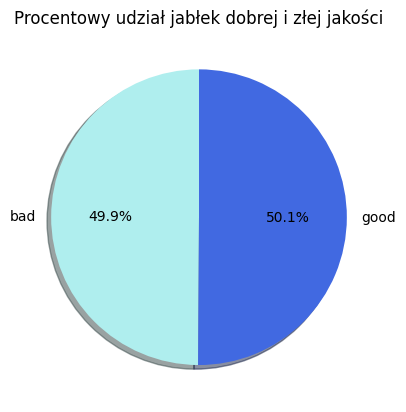

In [12]:
occurrences_count_pd = occurrences_count.toPandas()
labels = occurrences_count_pd['Quality']
sizes = occurrences_count_pd['count']
colors = ["paleturquoise", "royalblue"]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.title('Procentowy udział jabłek dobrej i złej jakości')
plt.show()

* Klasa "bad" obejmuje około 49.9% wszystkich jabłek, co oznacza, że niemal połowa zbioru składa się z jabłek zaklasyfikowanych jako złej jakości.
* Klasa "good" stanowi około 50.1% zbioru, co sugeruje, że druga połowa to jabłka uznane za dobrej jakości.



#### Zamiana zmiennej kategorycznej "Quality" na zmienną liczbową

In [13]:
indexer = StringIndexer(inputCol='Quality', outputCol='QualityIndex')
df_spark = indexer.fit(df_spark).transform(df_spark)

#### Usunięcie kolumny "Id"

In [14]:
df_spark = df_spark.drop('A_id')

#### Macierz par wszystkich atrybutów



In [15]:
df_pandas=df_spark.drop('QualityIndex').toPandas()

<Figure size 1200x800 with 0 Axes>

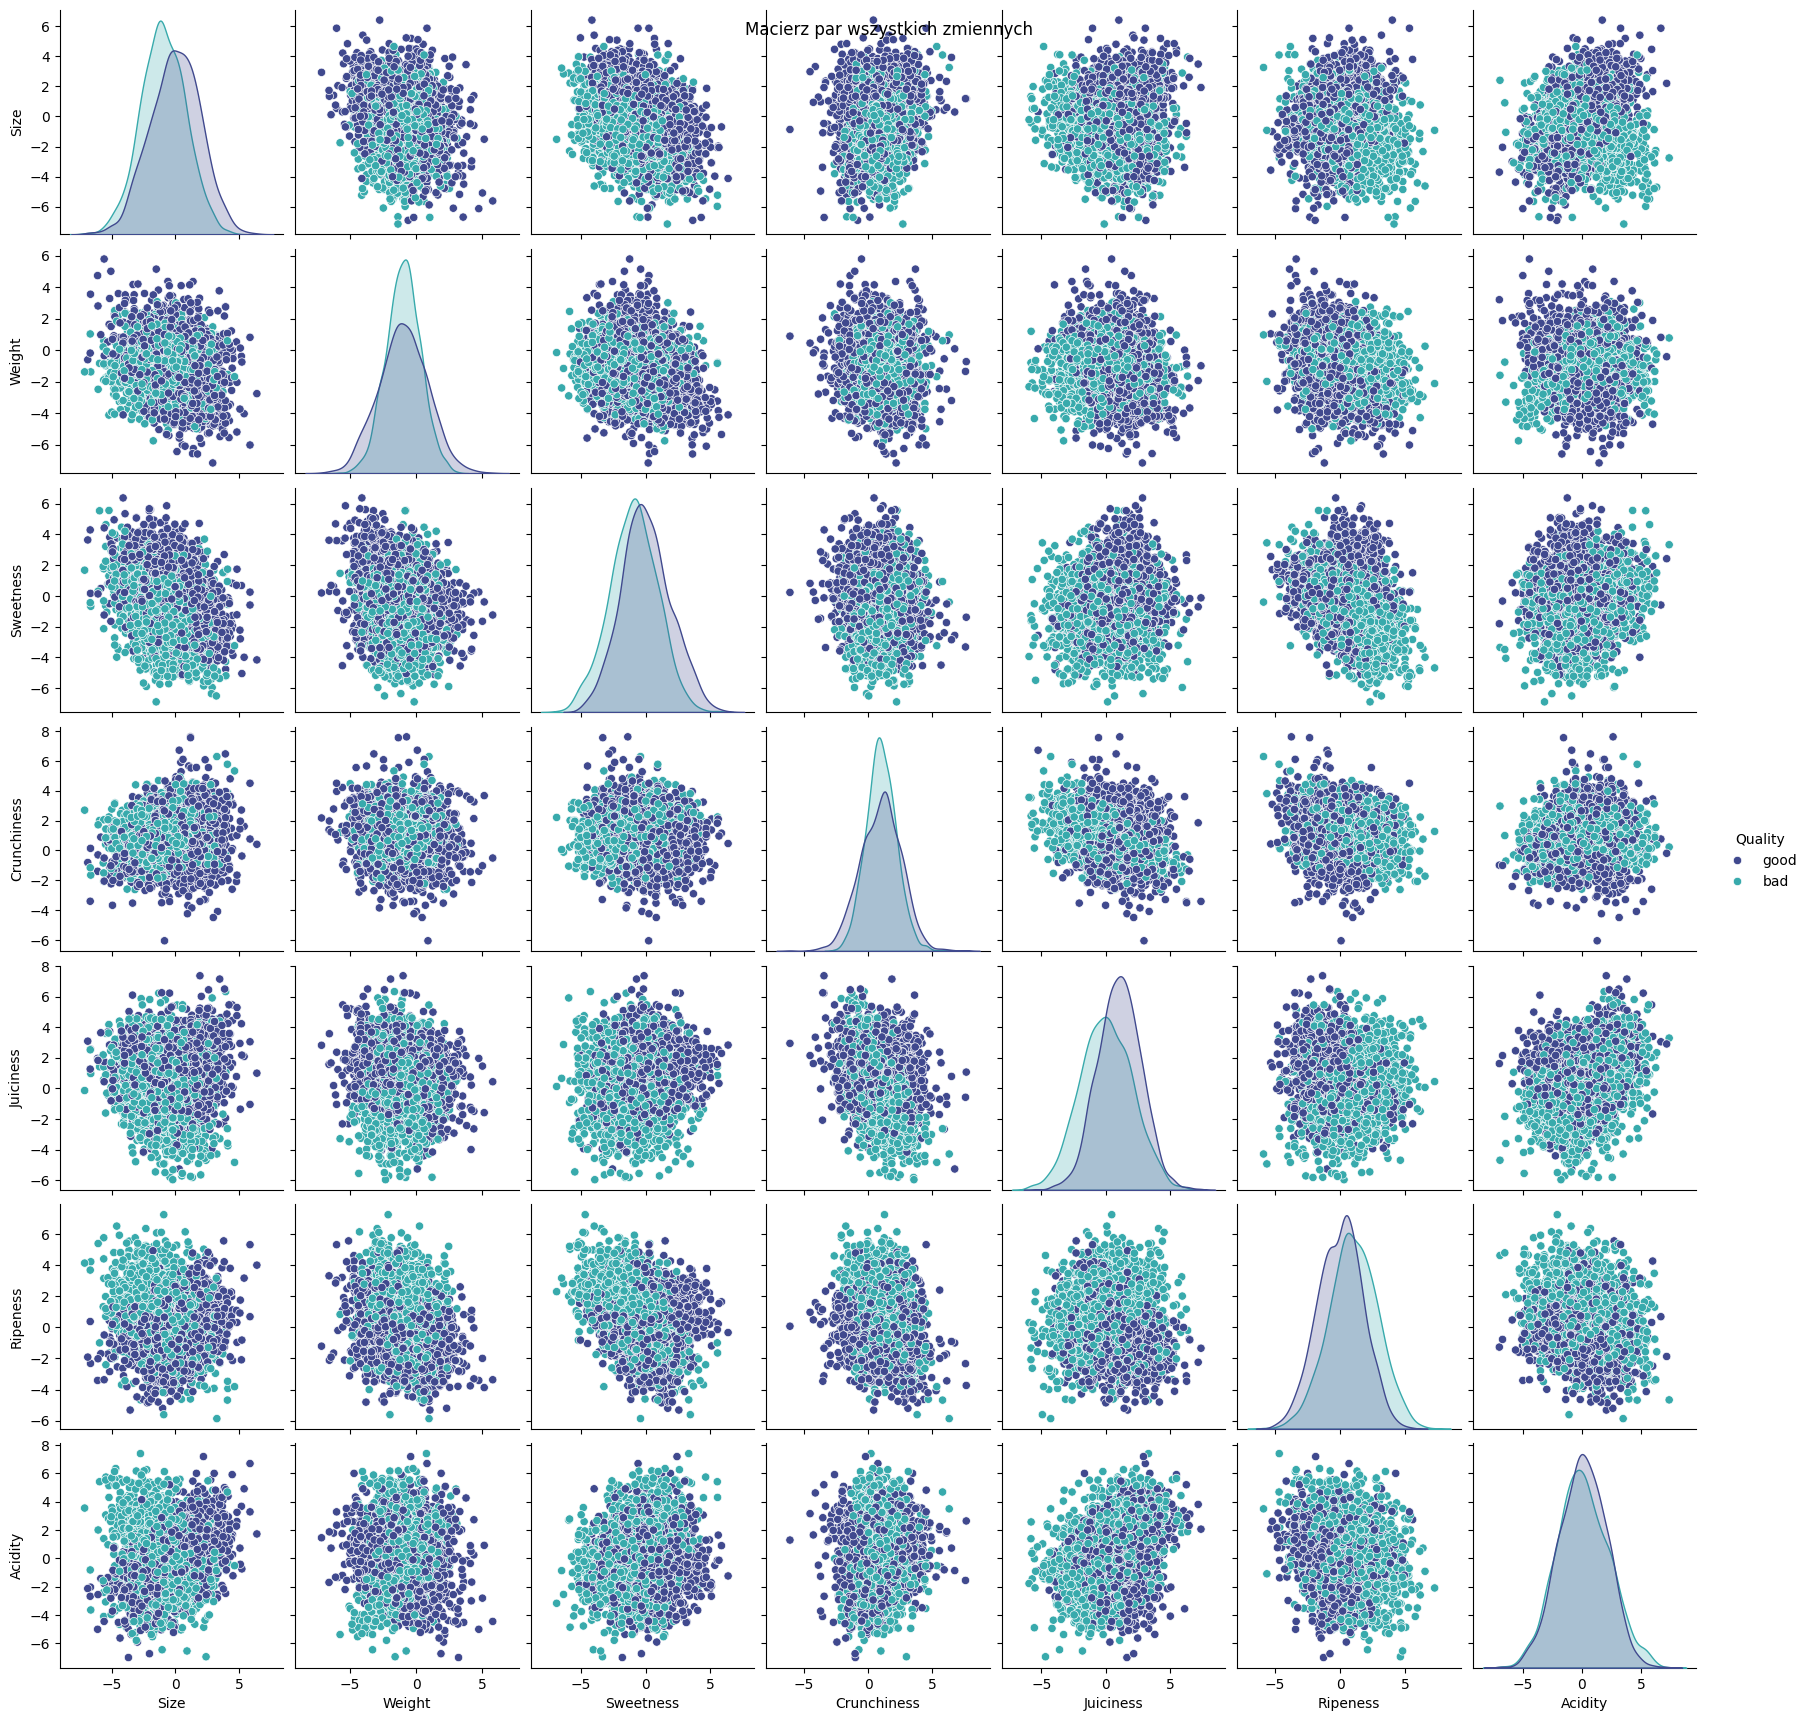

In [16]:
plt.figure(figsize=(12, 8))
sns.pairplot(df_pandas, hue='Quality', palette='mako')
plt.suptitle("Macierz par wszystkich zmiennych")
plt.show()

Analizując wykresy rozrzutu dla wszystkich par atrybutów opisujących jakość jabłek, zauważamy, że chmury punktów tworzą regularne kształty, co sugeruje pewne uporządkowanie w relacjach między analizowanymi cechami.

Ponadto, widoczność grup punktów różnicowanych za pomocą etykiety "Quality" (jabłka dobrej lub złej jakości), pozwala na identyfikację wyraźnych wzorców w kontekście jakości jabłek. Analiza tych klastrów umożliwia precyzyjne zrozumienie, które kombinacje atrybutów są charakterystyczne dla jabłek o określonej jakości.

#### Histogramy dla wszystkich atrybutów

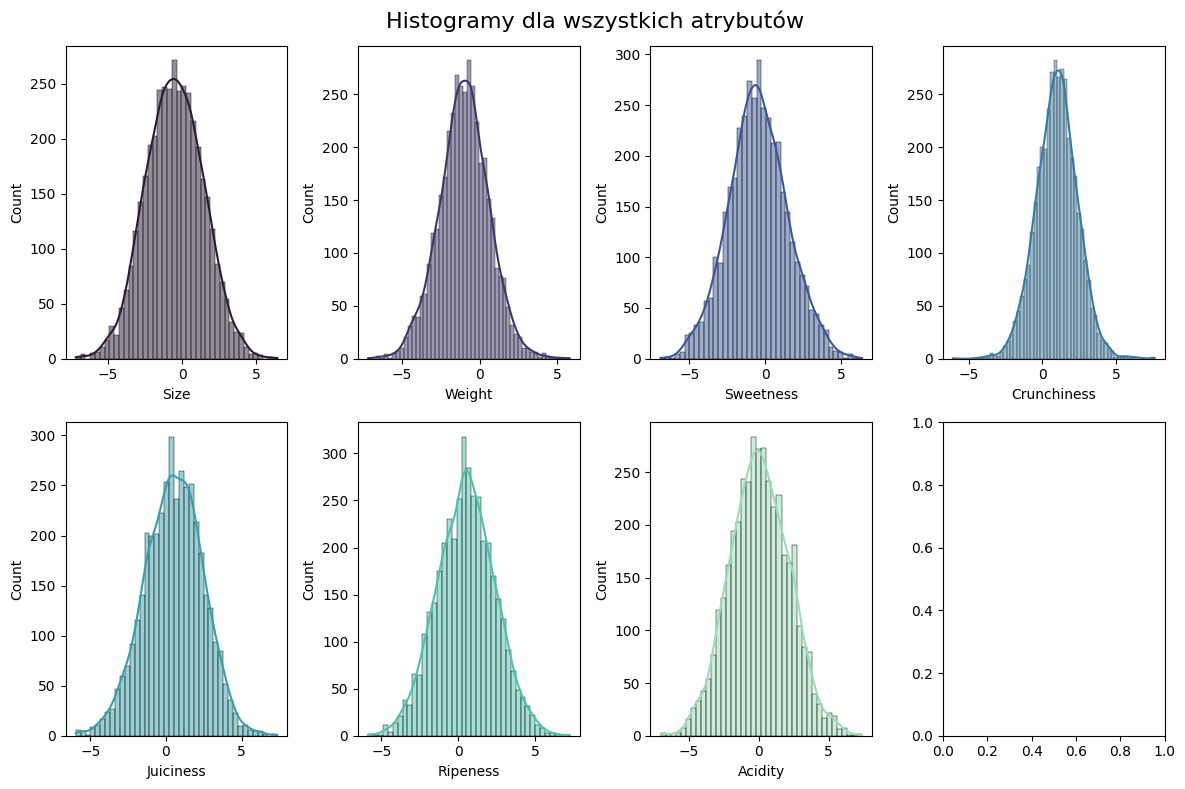

In [17]:
df_pandas=df_pandas.drop('Quality',axis=1)
fig,axis = plt.subplots(nrows=2,ncols=4,figsize=(12,8))
color = sns.color_palette("mako", len(df_pandas.columns))
axis = axis.flat

for i , col in enumerate(df_pandas):
    sns.histplot(data = df_pandas,x=df_pandas[col],ax=axis[i],color=color[i],kde=True,)

plt.suptitle("Histogramy dla wszystkich atrybutów", fontsize=16)
plt.tight_layout()
plt.show()

Wykresy historgramu dla poszczególnych atrybutów wskazują, że rozkady te są zblizone do rozkładu normalnego. Zauważa się niewilką asymetrię w niektórych przypadkach, jednak jest ona właciwie znikoma. Można więc stwierdzć
większośc danych jest skoncentrowane i bez znacznych odchyleń.

#### Mapa korelacji

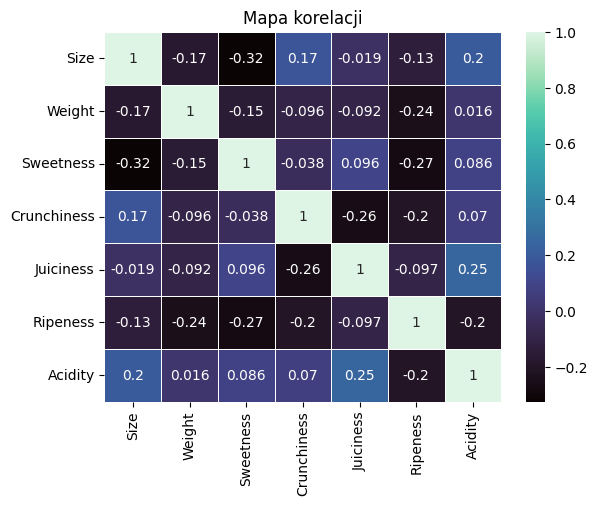

In [18]:
correlation_matrix=df_pandas.corr()
colors = sns.color_palette("mako", as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=colors, linewidths=.5)
plt.title("Mapa korelacji")
plt.show()

Analizując macierz korelacji między poszczególnymi atrybutami używanymi do klasyfikacji jabłek, można dostrzec pewne wzorce. Istnieje umiarkowana ujemna korelacja między rozmiarem jabłka a jego słodyczą, co sugeruje, że większe jabłka mogą być mniej słodkie. Waga jabłka wykazuje niewielką ujemną korelację z jego soczystością, co oznacza, że cięższe jabłka mogą być nieco mniej soczyste. Pozytywna korelacja między słodyczą a dojrzałością wskazuje, że bardziej dojrzałe jabłka mogą być również słodsze. Istnieje umiarkowana ujemna korelacja między chrupkością a soczystością, co sugeruje, że bardziej chrupkie jabłka mogą być mniej soczyste. Wyraźna dodatnia korelacja między soczystością a kwasowością wskazuje, że bardziej soczyste jabłka mogą być bardziej kwaszone.

#### Identyfikacja wartości odstjących

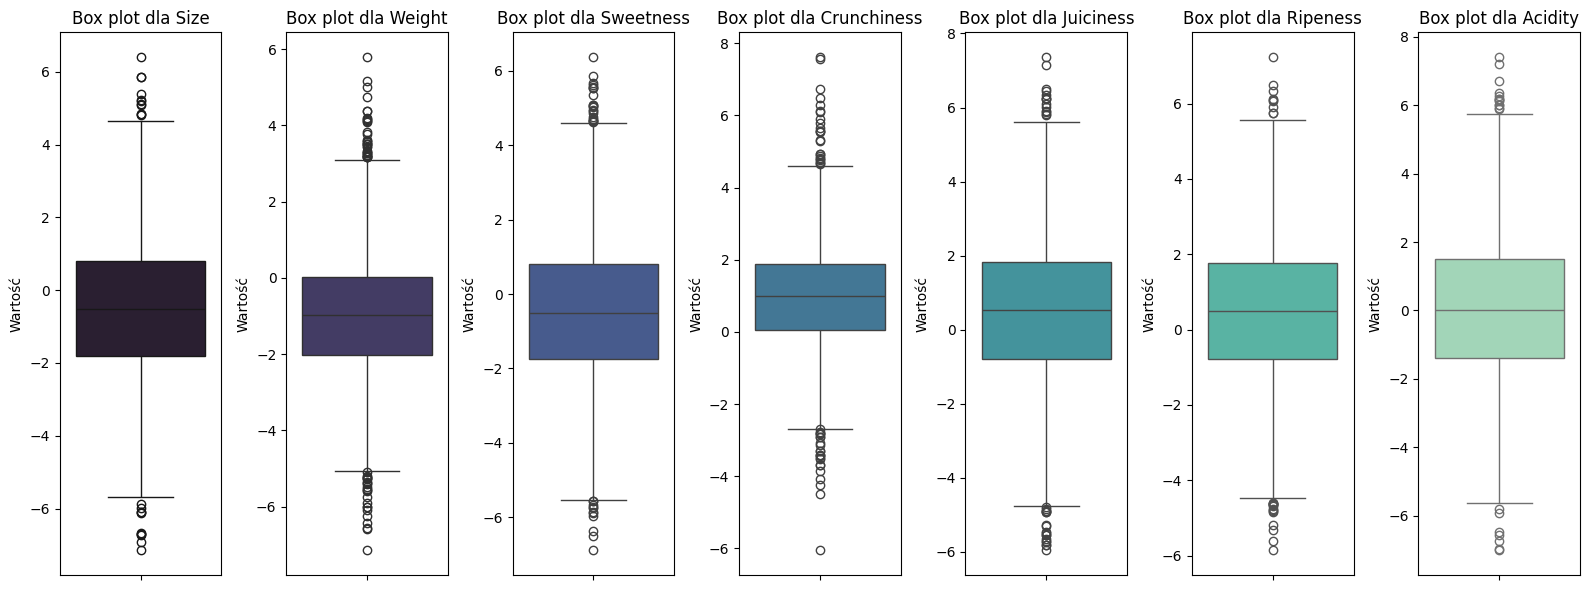

In [19]:
color = sns.color_palette("mako", len(df_pandas.columns))

fig, axes = plt.subplots(1, len(df_pandas.columns), figsize=(16, 6))
for i, col in enumerate(df_pandas.columns):
    sns.boxplot(y=df_pandas[col], ax=axes[i], color=color[i])
    axes[i].set_title(f'Box plot dla {col}')
    axes[i].set_ylabel('Wartość')

plt.tight_layout()
plt.show()

Identyfikacji wartości odstjących dokonano za pomoca wykresów pudełkowych. Na ich podstawie można stwierdzić, że wśród atrybutów charaketryzujących jakość jabłek, identyfikuje się niewielkie ilości wartości znacznie różniących się od pozostaych obserwacji. Odtsetek ten jest stosounkwo niewielki, a odchylenia nie są duże. Na tej podstawie zdecydowano o nieeliminacji tych wartości.

### 5. Wybranie cech i etykiet

Na tym etapie skupiono się na procesie wyboru istotnych cech oraz etykiet, które posłużą jako fundament dla modeli klasyfikacyjnych.

In [20]:
vector_assembler = VectorAssembler(inputCols=['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity'], outputCol="features")
df_spark = vector_assembler.transform(df_spark)

### 6. Podział zbioru na podzbiór treningowy i testowy

Kluczowym etapem przygotowania danych do procesu klasyfikacji jest podział zbioru na zbiór treningowy i testowy. W tej sekcji przeprowadzono operację podziału tak, aby zbiór testowy stanowił 20% całego zbioru danych.

In [21]:
train_data, test_data = df_spark.randomSplit([0.8, 0.2], seed=42)

### 7. Implementacja klasyfikatorów




W ramach tego etapu przystąpiono do implementacji dwóch kluczowych algorytmów klasyfikacyjnych: drzew decyzyjnych oraz regresji logistycznej. Po zakończeniu implementacji, każdy z modeli będzie oceniony na zbiorze testowym, a następnie zostanie przeprowadzony proces hiperparametryzacji w celu dostosowania parametrów modeli. Głownym celem tego działania jest wybór najlepszego modelu, co umożliwi skuteczną klasyfikację jabłek na podstawie ich atrybutów.

  ### 7.1. Drzewa decyzyjne

#### **a. Budowa klasyfikatora**

In [22]:
tree_classifier = DecisionTreeClassifier(featuresCol="features", labelCol="QualityIndex", maxDepth=1, seed=101, minInstancesPerNode=2)

#### **b. Wytrenowanie modelu**

In [23]:
tree_model = tree_classifier.fit(train_data)

Po usunięciu wartości odstjących

#### **c. Wypróbowanie modelu na zbiorze testowym**

In [24]:
tree_model_predictions = tree_model.transform(test_data)

### **d. Ocena modelu**

In [25]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics

In [26]:
evaluator_binary = BinaryClassificationEvaluator(labelCol="QualityIndex", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
area_under_roc = evaluator_binary.evaluate(tree_model_predictions)
print(f"Area under ROC: {area_under_roc}")

Area under ROC: 0.3930011552126245


* **Area under ROC** wynosząca 0.393 oznacza, że model jest w stanie poprawnie sklasyfikować jedynie około 39.3% obserwacji, co oznacza ograniczoną zdolność do rozróżniania między pozytywnymi i negatywnymi przypadkami.

In [27]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="QualityIndex", metricName="accuracy")
accuracy = evaluator.evaluate(tree_model_predictions)

precision_evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="QualityIndex", metricName="weightedPrecision")
precision = precision_evaluator.evaluate(tree_model_predictions)

recall_evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="QualityIndex", metricName="weightedRecall")
recall = recall_evaluator.evaluate(tree_model_predictions)

f1_evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="QualityIndex", metricName="f1")
f1_score = f1_evaluator.evaluate(tree_model_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.6078167115902965
Precision: 0.6177576512202944
Recall: 0.6078167115902965
F1 Score: 0.598500023844665


* **Accuracy:** Model poprawnie sklasyfikował około 60.78% wszystkich przypadków, co może być postrzegane jako umiarkowanie skuteczne.

* **Precision:** Około 61.78% przypadków, które model sklasyfikował jako pozytywne, faktycznie były pozytywne. Wartość ta pomaga zrozumieć, jak dobrze model identyfikuje poprawne pozytywne przypadki.

* **Recall:** Około 60.78% wszystkich pozytywnych przypadków zostało wykrytych przez model. Recall ocenia zdolność modelu do odnajdywania wszystkich pozytywnych instancji.

* **F1 Score:**Wartość F1 Score równa 0.5985 oznacza, że model osiągnął umiarkowaną harmonię między precyzją a czułością w zadaniu klasyfikacji


In [28]:
prediction_and_label = tree_model_predictions.select("prediction", "QualityIndex").rdd.map(lambda row: (float(row["prediction"]), float(row["QualityIndex"])))
metrics = MulticlassMetrics(prediction_and_label)
conf_matrix = metrics.confusionMatrix().toArray()


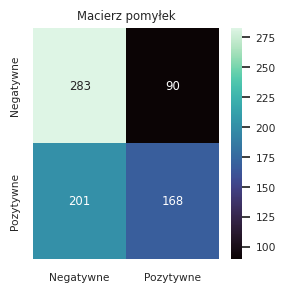

In [29]:
conf_matrix_list = conf_matrix.tolist()
class_labels = ["Negatywne", "Pozytywne"]

plt.figure(figsize=(3, 3))
sns.set(font_scale=0.7)
sns.heatmap(conf_matrix_list, annot=True, fmt=".0f", cmap="mako", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Macierz pomyłek")
plt.show()


* Prawdziwie Pozytywne (TP): 168 poprawnie sklasyfikowanych jabłek dobrej jakości
* Prawdziwie Negatywne (TN): 283 poprawnie sklasyfikowanych jabłek złej jakości
* Fałszywie Pozytywne (FP): 90 jabłek złej jakości, sklasyfikowane błędnie jako dobre
* Fałszywie Negatywne (FN): 201 jabłek dobrej jakości, sklasyfikowane błędnie jako złe

#### **e. Optymalizacja hiperparametrów z zastosowaniem siatki**

In [30]:
dt_classifier = DecisionTreeClassifier(featuresCol="features", labelCol="QualityIndex")
pipeline = Pipeline(stages=[dt_classifier])

param_grid1 = ParamGridBuilder().addGrid(dt_classifier.maxDepth, [1, 2, 3, 4, 5, 7, 10, 12]) \
                                .addGrid(dt_classifier.minInstancesPerNode, [1, 2, 3, 4, 5, 6, 8, 10]) \
                                .build()

cross_validator1 = CrossValidator(estimator=pipeline,
                                 estimatorParamMaps=param_grid1,
                                 evaluator=BinaryClassificationEvaluator(labelCol="QualityIndex", rawPredictionCol="rawPrediction", metricName="areaUnderROC"),
                                 numFolds=5)

cv_model1 = cross_validator1.fit(train_data)
predictions1 = cv_model1.transform(test_data)

In [31]:
best_model = cv_model1.bestModel

best_max_depth = best_model.stages[0].getOrDefault("maxDepth")
best_min_instances_per_node = best_model.stages[0].getOrDefault("minInstancesPerNode")

print(f"Best Max Depth: {best_max_depth}")
print(f"Best Min Instances Per Node: {best_min_instances_per_node}")

Best Max Depth: 12
Best Min Instances Per Node: 1


Optymalne drzewo regresji zostało osiągnięte przy użyciu parametrów Max Depth równego 12 i Min Instances Per Node równego 1.



**Obszar pod krzywą ROC**

In [32]:
prediction_last = predictions1.select("rawPrediction", "QualityIndex").rdd.map(lambda row: (float(row["rawPrediction"][1]), float(row["QualityIndex"])))

metrics = BinaryClassificationMetrics(prediction_last)

area_under_roc = metrics.areaUnderROC
print(f"Area under ROC: {area_under_roc}")

Area under ROC: 0.8384627680056962


Wartość obszaru pod krzywą ROC wynosząca 83.85% sugeruje, że model ma stosunkowo wysoką zdolność do rozróżniania między pozytywnymi i negatywnymi przypadkami.

**Dopasowanie**

In [33]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="QualityIndex", metricName="accuracy")
accuracy = evaluator.evaluate(predictions1)

precision_evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="QualityIndex", metricName="weightedPrecision")
precision = precision_evaluator.evaluate(predictions1)

recall_evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="QualityIndex", metricName="weightedRecall")
recall = recall_evaluator.evaluate(predictions1)

f1_evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="QualityIndex", metricName="f1")
f1_score = f1_evaluator.evaluate(predictions1)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.8099730458221024
Precision: 0.8109118183666796
Recall: 0.8099730458221024
F1 Score: 0.8097916363367896


* **Accuracy:** Model precyzyjnie sklasyfikował około 81% wszystkich próbek, co oznacza, że jest bardzo efektywny w ogólnym przewidywaniu.

* **Precision:** Ponad 81.09% przypadków sklasyfikowanych jako pozytywne przez model faktycznie należało do tej kategorii. Model wykazuje precyzję, eliminując fałszywie pozytywne wyniki.

* **Recall:** Model zdołał skutecznie wykryć około 81% wszystkich rzeczywistych pozytywnych przypadków.

* **F1 Score:** Wartość F1 Score wynosząca 80.98% podkreśla, że model osiągnął zrównoważoną harmonię między precyzją a czułością. Oznacza to, że jest on zdolny do równoczesnego minimalizowania błędów precyzji i czułości, co jest kluczowe dla skutecznej klasyfikacji.

**Macierz pomyłek**

In [34]:
prediction_lab1 = predictions1.select("prediction", "QualityIndex").rdd.map(lambda row: (float(row["prediction"]), float(row["QualityIndex"])))
metrics1 = MulticlassMetrics(prediction_lab1)
conf_matrix = metrics1.confusionMatrix().toArray()
conf_matrix_list = conf_matrix.tolist()

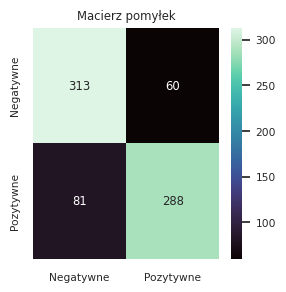

In [35]:
class_labels = ["Negatywne", "Pozytywne"]

plt.figure(figsize=(3, 3))
sns.set(font_scale=0.7)
sns.heatmap(conf_matrix_list, annot=True, fmt=".0f", cmap="mako", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Macierz pomyłek")
plt.show()


* Prawdziwie Pozytywne (TP): 288 poprawnie sklasyfikowanych jabłek dobrej jakości
* Prawdziwie Negatywne (TN): 313 poprawnie sklasyfikowanych jabłek złej jakości
* Fałszywie Pozytywne (FP): 60 jabłek złej jakości, sklasyfikowane błędnie jako dobre
* Fałszywie Negatywne (FN): 81 jabłek dobrej jakości, sklasyfikowane błędnie jako złe

**Podsumowanie**

Po przeprowadzeniu dopasowania hiperparametrów modelu, można zauwazyć znaczną poprawę wydajności w porównaniu do wyników przed hiperparametryzacją. Model osiąga teraz znacznie wyższe wartości oceny parametrów, takich jak Accuracy, Precision, Recall i F1 Score.

W wyniku tej optymalizacji, model jest bardziej precyzyjny i czuły w identyfikowaniu jabłek jako dobrej lub złej jakości. Przewiduje także większą liczbę przypadków poprawnie sklasyfikowanych, co przekłada się na bardziej efektywną klasyfikację.

  ### 7.2. Regresja logistyczna

#### **a. Budowa klasyfikatora**

In [36]:
from pyspark.ml.classification import LogisticRegression


In [37]:
lr = LogisticRegression(featuresCol="features", labelCol="QualityIndex")


#### **b. Wytrenowanie modelu**

In [38]:
lr_model = lr.fit(train_data)

#### **c. Wypróbowanie modelu na zbiorze testowym**

In [39]:
lr_model_predictions = lr_model.transform(test_data)

#### **d. Ocena modelu**

**Obszar pod krzywą ROC**

In [40]:
evaluator_binary = BinaryClassificationEvaluator(labelCol="QualityIndex", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
area_under_roc = evaluator_binary.evaluate(lr_model_predictions)
print(f"Area under ROC: {area_under_roc}")

Area under ROC: 0.8025676235314667


Wartość obszaru pod krzywą ROC wynosząca 80.26% wskazuje, że model całkiem dobrze rozróżniania przypadki pozytywne i negatywne.


**Dopasowanie**

In [41]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="QualityIndex", metricName="accuracy")
accuracy = evaluator.evaluate(lr_model_predictions)

precision_evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="QualityIndex", metricName="weightedPrecision")
precision = precision_evaluator.evaluate(lr_model_predictions)

recall_evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="QualityIndex", metricName="weightedRecall")
recall = recall_evaluator.evaluate(lr_model_predictions)

f1_evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="QualityIndex", metricName="f1")
f1_score = f1_evaluator.evaluate(lr_model_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.7250673854447439
Precision: 0.7251401302323751
Recall: 0.725067385444744
F1 Score: 0.7250194338241682


* **Accuracy:** Model dokładnie sklasyfikował około 72.51% wszystkich przypadków, co świadczy o jego dobrej zdolności do trafnej klasyfikacji.

* **Precision:** W przypadku pozytywnych klasyfikacji modelu, około 72.51% z nich faktycznie należało do tej kategorii.

* **Recall:** Model zdołał wykryć około 72.51% wszystkich istniejących pozytywnych przypadków. Oznacza to, że model ma zdolność do efektywnego identyfikowania większości rzeczywistych pozytywnych przypadków.

* **F1 Score:** Wartość F1 Score na poziomie 72.5% świadczy o wysokiej harmonii między precyzją a czułością. Model osiąga równowagę pomiędzy minimalizacją fałszywych pozytywów a wykrywaniem rzeczywistych pozytywnych przypadków, co czyni go całkiem efektywnym w zadaniu klasyfikacji.

**Macierz pomyłek**

In [42]:
prediction_and_label = lr_model_predictions.select("prediction", "QualityIndex").rdd.map(lambda row: (float(row["prediction"]), float(row["QualityIndex"])))
metrics = MulticlassMetrics(prediction_and_label)
conf_matrix = metrics.confusionMatrix().toArray()


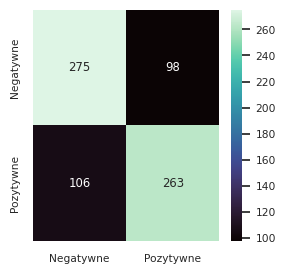

In [43]:
conf_matrix_list = conf_matrix.tolist()
class_labels = ["Negatywne", "Pozytywne"]

plt.figure(figsize=(3, 3))
sns.set(font_scale=0.7)
sns.heatmap(conf_matrix_list, annot=True, fmt=".0f", cmap="mako", xticklabels=class_labels, yticklabels=class_labels)
plt.show()


* Prawdziwie Pozytywne (TP): 263 poprawnie sklasyfikowanych jabłek dobrej jakości
* Prawdziwie Negatywne (TN): 275 poprawnie sklasyfikowanych jabłek złej jakości
* Fałszywie Pozytywne (FP): 98 jabłek złej jakości, sklasyfikowane błędnie jako dobre
* Fałszywie Negatywne (FN): 106 jabłek dobrej jakości, sklasyfikowane błędnie jako złe

#### **e. Optymalizacja hiperparametrów z zastosowaniem siatki**

In [44]:

lr_classifier = LogisticRegression(featuresCol="features", labelCol="QualityIndex")

pipeline2 = Pipeline(stages=[lr_classifier])

param_grid2 = ParamGridBuilder().addGrid(lr_classifier.maxIter, [5,10,15, 20, 30]) \
                                .addGrid(lr_classifier.regParam, [0.01,0.05, 0.001,0.1, 0.5,0.8]) \
                                .build()

cross_validator2 = CrossValidator(estimator=pipeline2,
                                 estimatorParamMaps=param_grid2,
                                 evaluator=BinaryClassificationEvaluator(labelCol="QualityIndex", rawPredictionCol="rawPrediction", metricName="areaUnderROC"),
                                 numFolds=5)

cv_model2 = cross_validator2.fit(train_data)

predictions2 = cv_model2.transform(test_data)


**Najlpesze parametry modelu:**

In [45]:
best_model2 = cv_model2.bestModel

best_max_depth2 = best_model2.stages[0].getOrDefault("maxIter")
best_min_instances_per_node2 = best_model2.stages[0].getOrDefault("regParam")

print(f"Best Max Iter: {best_max_depth2}")
print(f"Best regParam: {best_min_instances_per_node2}")

Best Max Iter: 15
Best regParam: 0.001


Optymalne parametry regresji logistycznej zostały osiągnięte przy użyciu parametrów: maksymalna liczba iteracji -  15, parametr regularyzacji -  0.001.


**Obszar pod krzywą ROC:**

In [46]:
prediction_and_label2 = predictions2.select("rawPrediction", "QualityIndex").rdd.map(lambda row: (float(row["rawPrediction"][1]), float(row["QualityIndex"])))

metrics2 = BinaryClassificationMetrics(prediction_and_label2)

area_under_roc2 = metrics2.areaUnderROC
print(f"Area under ROC: {area_under_roc2}")

Area under ROC: 0.8028727740360551


Wartość obszaru pod krzywą ROC (Receiver Operating Characteristic) wynosząca 80.29% wskazuje, że model ma umiarkowanie dobre zdolności rozróżniania między pozytywnymi a negatywnymi przypadkami.

In [47]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="QualityIndex", metricName="accuracy")
accuracy = evaluator.evaluate(predictions2)

precision_evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="QualityIndex", metricName="weightedPrecision")
precision = precision_evaluator.evaluate(predictions2)

recall_evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="QualityIndex", metricName="weightedRecall")
recall = recall_evaluator.evaluate(predictions2)

f1_evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="QualityIndex", metricName="f1")
f1_score = f1_evaluator.evaluate(predictions2)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.7264150943396226
Precision: 0.7264679014851838
Recall: 0.7264150943396226
F1 Score: 0.7263768232784305


* **Accuracy:** Model precyzyjnie sklasyfikował prawie 72.64% wszystkich przypadków, co dowodzi jego dobrej skuteczności w ogólnej poprawności przewidywań.

* **Precision:** Około 72.65% przypadków sklasyfikowanych przez model jako pozytywne rzeczywiście okazało się być pozytywnymi. Model wykazuje całkiem dobrą precyzję, unikając nadmiernego przypisywania negatywnych przypadków do pozytywnej klasy.

* **Recall:** Model z sukcesem wykrył około 72.64% wszystkich rzeczywistych pozytywnych przypadków.

* **F1 Score:** Wartość F1 Score na poziomie 72.64% ilustruje, że model osiągnął dobrą równowagę między precyzją a czułością.

**Macierz pomyłek**

In [48]:
prediction_and_label2 = predictions2.select("prediction", "QualityIndex").rdd.map(lambda row: (float(row["prediction"]), float(row["QualityIndex"])))
metrics2 = MulticlassMetrics(prediction_and_label2)
conf_matrix = metrics2.confusionMatrix().toArray()

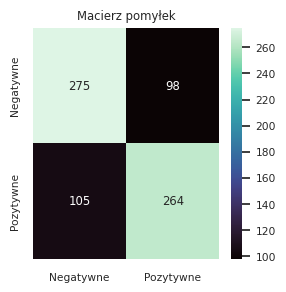

In [49]:
conf_matrix_list = conf_matrix.tolist()
class_labels = ["Negatywne", "Pozytywne"]

plt.figure(figsize=(3, 3))
sns.set(font_scale=0.7)
sns.heatmap(conf_matrix_list, annot=True, fmt=".0f", cmap="mako", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Macierz pomyłek")
plt.show()


* Prawdziwie Pozytywne (TP): 264 poprawnie sklasyfikowanych jabłek dobrej jakości
* Prawdziwie Negatywne (TN): 275 poprawnie sklasyfikowanych jabłek złej jakości
* Fałszywie Pozytywne (FP): 98 jabłek złej jakości, sklasyfikowane błędnie jako dobre
* Fałszywie Negatywne (FN): 105 jabłek dobrej jakości, sklasyfikowane błędnie jako złe


**Podsumowanie**

Po dostosowaniu optymalnych hiperparametrów, model regresji logistycznej wykazuje niewielką poprawę w wynikach klasyfikacyjnych w porównaniu do stanu przed dostosowaniem. Wyniki miar jakości modelu osiagają minimlanie lapsze wyniki niż przed hiperparametryzacją.

  ### 7.3. Wybór najlepszego modelu

Po przeprowadzeniu analizy różnych modeli klasyfikacyjnych dla oceny jakości jabłek, wyróżnia się **model drzewa klasyfikacyjnego po hiperparametryzacji**  (maksymalna głębokość: 12, minimalna liczba przypadków w węźle: 1) jako najbardziej efektywny.

W porównaniu z modelem regresji logistycznej przed i po hiperparametryzacji, drzewo klasyfikacyjne po optymalizacji wydaje się lepiej radzić sobie z klasyfikacją jabłek. Po parametryzacji, uzyskało ono dokładność klasyfikacji 81%, co przewyższa wynik modelu regresji logistycznej (72.64%). Dodatkowo, zrównoważone wartości Precision, Recall i F1 Score drzewa decyzyjnego po parametryzacji potwierdzają jego skuteczność w identyfikacji jakości jabłek.

Drzewo decyzyjne, uwzględniając złożone relacje między atrybutami, osiąga niższy odsetek błędów w porównaniu z modelem regresji logistycznej, co przekłada się na trafniejszą klasyfikację na podstawie rozmiaru, wagi, słodyczy, chrupkości, soczystości, dojrzałości i kwasowości jabłek.

Podsumowując, model drzewa klasyfikacyjnego po hiperparametryzacji wydaje się być preferowanym modelem do skutecznej klasyfikacji jabłek na podstawie ich jakości.

### 8. Klasyfikacja na podstawie nowych danych

Jako ostatni etap analizy, wykorzystano model drzewa klasyfikacyjnego, wybrany ze względu na jego lepszą skuteczność. Ten model posłużył do klasyfikacji nowych danych, umożliwiając precyzyjne rozróżnienie jabłek na kategorie dobrej lub złej jakości. Proces ten stanowi kluczowy element w przenoszeniu zdobytej wiedzy na praktykę, umożliwiając efektywną predykcję jakości owoców na podstawie ich cech.

**a. Wprowadzenie nowych danych**

In [50]:
new_data = [
    [-3.0, -2.5, 5.0, -1.0, 2.0, 0.5, -0.5],
    [-1.5, -3.0, 4.0, 1.5, 1.0, 0.8, -0.7],
    [0.0, -1.0, -1.5, 0.0, 3.0, 0.0, 2.6],
    [-0.5, -2.0, 1.5, 0.0, 3.5, -3.0, 0.8],
    [1.5, -1.3, -0.3, -0.5, 3.0, -1.3, 0.5],
    [2.0, 1.0, 4.0, 0.5, 3.5, 1.0, -0.2],
    [0.5, 0.5, 3.0, 0.0, 2.5, 0.2, 0.0],
    [1.0, -1.0, 2.0, -0.5, 2.0, 0.8, 0.3]
]


**b. Zastosowanie modelu do nowych danych**

In [51]:
schema = StructType([
    StructField("Size", FloatType(), True),
    StructField("Weight", FloatType(), True),
    StructField("Sweetness", FloatType(), True),
    StructField("Crunchiness", FloatType(), True),
    StructField("Juiciness", FloatType(), True),
    StructField("Ripeness", FloatType(), True),
    StructField("Acidity", FloatType(), True)
])

new_data_df = spark.createDataFrame(new_data, schema=schema)

feature_cols = ["Size", "Weight", "Sweetness", "Crunchiness", "Juiciness", "Ripeness", "Acidity"]
vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

predictions_new_data = cv_model1.bestModel.transform(vector_assembler.transform(new_data_df))

**c. Klasyfikacja owoców**

In [52]:
from pyspark.sql.functions import col

predictions_new_data = predictions_new_data.select(
    col("Size").alias("Size"),
    col("Weight").alias("Weight"),
    col("Sweetness").alias("Sweetness"),
    col("Crunchiness").alias("Crunchiness"),
    col("Juiciness").alias("Juiciness"),
    col("Ripeness").alias("Ripeness"),
    col("Acidity").alias("Acidity"),
    "prediction",
    "rawPrediction",
    "probability"
)
predictions_new_data.show(truncate=False);

+----+------+---------+-----------+---------+--------+-------+----------+-------------+-----------------------------------------+
|Size|Weight|Sweetness|Crunchiness|Juiciness|Ripeness|Acidity|prediction|rawPrediction|probability                              |
+----+------+---------+-----------+---------+--------+-------+----------+-------------+-----------------------------------------+
|-3.0|-2.5  |5.0      |-1.0       |2.0      |0.5     |-0.5   |0.0       |[182.0,0.0]  |[1.0,0.0]                                |
|-1.5|-3.0  |4.0      |1.5        |1.0      |0.8     |-0.7   |0.0       |[182.0,0.0]  |[1.0,0.0]                                |
|0.0 |-1.0  |-1.5     |0.0        |3.0      |0.0     |2.6    |1.0       |[0.0,14.0]   |[0.0,1.0]                                |
|-0.5|-2.0  |1.5      |0.0        |3.5      |-3.0    |0.8    |0.0       |[7.0,6.0]    |[0.5384615384615384,0.46153846153846156] |
|1.5 |-1.3  |-0.3     |-0.5       |3.0      |-1.3    |0.5    |0.0       |[118.0,2.0]  |[0.

Na podstawie powyższej tabeli można zobaczyć jak model radzi sobie z klasyfikacją podczas wprowadzenia nowych danych

Przewidywania modelu są zróżnicowane, jednakże w większości przypadków model wykazuje pewność w klasyfikacji. Szczególnie interesujące są przypadki, w których model przypisuje bardzo wysokie prawdopodobieństwo do swoich predykcji, co sugeruje, że model może być użyteczny w praktyce przy ocenie jakości jabłek na podstawie ich cech.

Ostatecznie, wyniki te potwierdzają skuteczność drzewa klasyfikacyjnego w kontekście klasyfikacji jakości jabłek.

